# Load Data

In [16]:
import pandas as pd

df = pd.read_csv("owid-covid-data.csv")   # Load CSV

print(df.columns)  # Check column names

df.head()  # Preview data

df.isnull().sum()    # Check missing values

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

iso_code                                        0
continent                                   14352
location                                        0
date                                            0
total_cases                                 35741
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       292217
excess_mortality_cumulative                292217
excess_mortality                           292217
excess_mortality_cumulative_per_million    292217
Length: 67, dtype: int64

# Data Cleaning

In [18]:
countries = ["Kenya", "United States", "India"]      # Filter countries
df_filtered = df[df['location'].isin(countries)]
df_filtered = df_filtered.dropna(subset=['date', 'total_cases'])   # Drop rows with missing dates or total_cases
df_filtered['date'] = pd.to_datetime(df_filtered['date'])      # Convert 'date' to datetime
df_filtered[['total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']] = \
    df_filtered[['total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']].interpolate()   # Fill missing numeric values with interpolation

#  Exploratory Data Analysis (EDA)

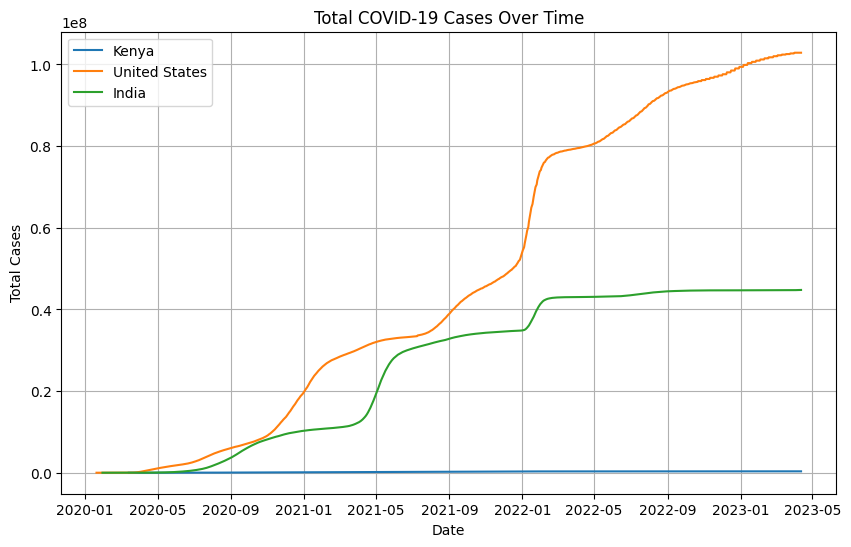

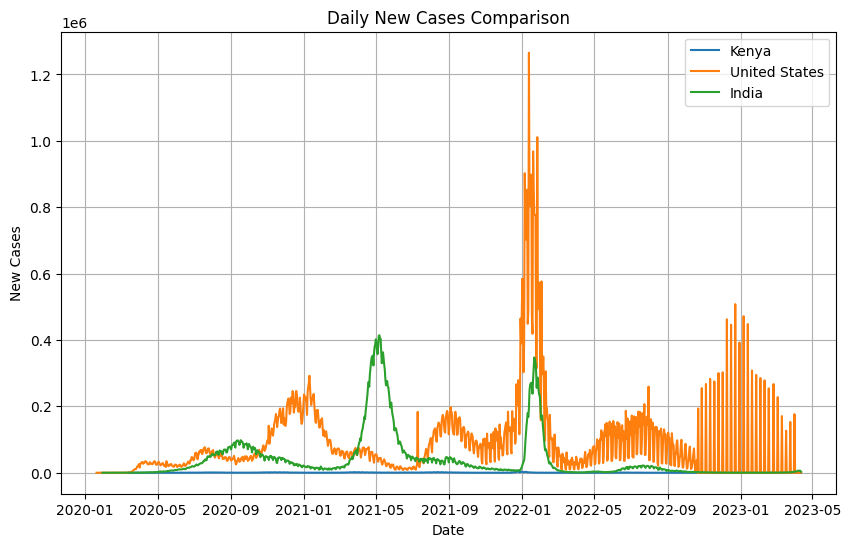

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total Cases Over Time
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.show()

# Daily New Cases Comparison
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)
plt.title("Daily New Cases Comparison")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.show()

# Death Rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

# Vaccination Progress

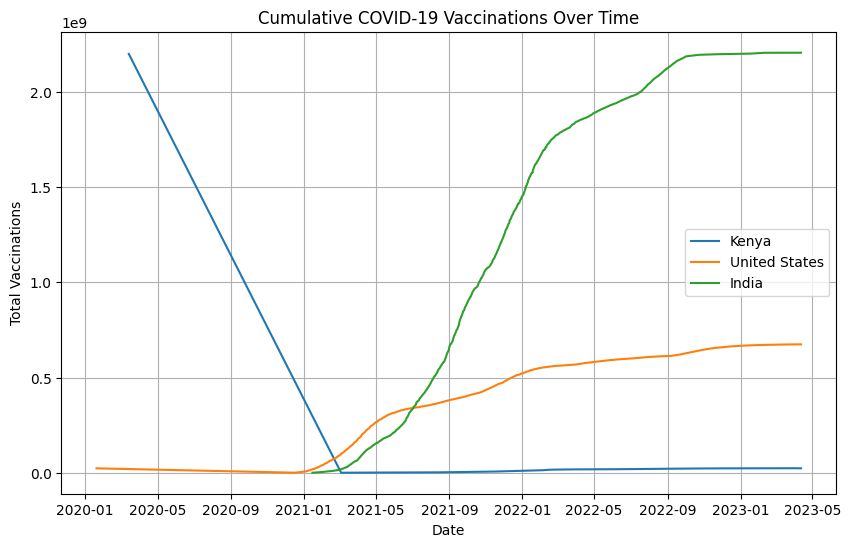

In [22]:
# Cumulative vaccinations over time
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.show()

# Choropleth Map with Plotly

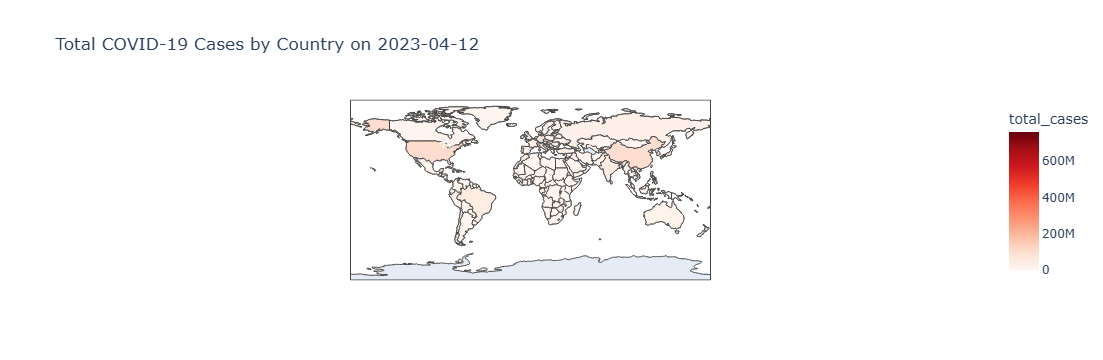

In [24]:
import plotly.express as px

# Prepare latest data
latest_date = df['date'].max()
df_latest = df[df['date'] == latest_date]
df_choropleth = df_latest[['iso_code', 'location', 'total_cases']].dropna()

fig = px.choropleth(df_choropleth,
                    locations='iso_code',
                    color='total_cases',
                    hover_name='location',
                    color_continuous_scale='Reds',
                    title=f"Total COVID-19 Cases by Country on {latest_date}")
fig.show()

# Insights & Reporting

### Insights
- 🇺🇸 The USA had the highest number of total cases throughout the pandemic.
- 🇮🇳 India experienced sharp spikes in daily new cases during mid-2021.
- 🇰🇪 Kenya's vaccination progress lagged behind the USA and India.
- The death rate varied significantly between countries and over time.
- Vaccination progress strongly correlated with declining new cases in some countries.